# Theme: Frozen Lake from Gym

**Official Document**\
https://www.gymlibrary.dev/environments/toy_text/frozen_lake/


**Action_Space**
- 4 = { 0: LEFT, 1: DOWN, 2: RIGHT, 3: UP }

**Observation_Space**
- 16 = 4マス × 4マス

**Rewards**
- 3 = {Reach goal(G): +1, Reach hole(H): 0, Reach frozen(F): 0 }

## §1 Q-Learning Argorhythm

**Q学習アルゴリズムによる最適行動価値関数の更新**

$$ Q^{new}(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \left( r_t + \gamma \max_{a'} \ Q(s_{t+1}, a') - Q(s_t, a_t) \right) $$

- $ Q(s, a) $: 状態$ s $でアクション$ a $を選択した時の価値関数(Q値).
- $ \alpha $: 学習率で, 新しい情報をどれだけ重視するかを決めるパラメータ.
- $ r $: 環境から得られる即時報酬.
- $ \gamma $: 将来の報酬を現在の価値に割り引く割引率.
- $ s' $: アクション後の次の状態.
- $ \max_{a'} Q(s', a') $: 状態$ s' $で可能な全てのアクション$ a' $の中で最も高いQ値.



\

**TD誤差= (実際の報酬+次の状態の最大Q値)-現在の状態のQ値**

$$\delta^{\ Q}_t = r_t + \gamma \max_{a'} \ Q \left( s_{t+1}, a' \right) - \ Q \left( s_t, a_t \right)$$



*参考文献: 杉山聡(2022)「分析モデル入門」ソシム P.307~308*

### Code

In [2]:
# ライブラリインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gym

# 環境の生成
env = gym.make('FrozenLake-v1')

# Q-tableの用意（16マス×4アクションでこの1枚を更新していく）
Q = np.zeros([env.observation_space.n, env.action_space.n])

print("初期Q-tabel:")
print(Q)

# ハイパーパラメータ
alpha = 0.8 #学習率
gamma = 0.95 # 割引率
episodes = 5000 # 試行回数
reward_list = [] # 報酬の保持

# 探索&評価＆学習（エピソード内にて随時更新して学習）
for i in range(episodes):
    counter = 0 # 回数を数える
    s = env.reset() # State（状態）の初期化 # タプル(状態のindex, 推移確率)
    total_reward = 0 # 報酬の合計を数値で初期化

    while counter < 99: # エピソード内で100回試行する #深層学習でいうイテレーション
        counter += 1

        # すべての可能なアクションに対するQ値の配列を取得する
        # 初期はランダムなノイズで探索と利用のバランスさせている
        # エピソードが進むにつれて, ノイズが減少するので探索が減少する（ε-Greedy法のような定義）
        a = np.argmax(Q[s, :] + np.random.randn(env.action_space.n) * (1 / (i +1)))

        #アクションを環境に適用し, その結果を次の状態s_next, 即時報酬r, 終了有無doneを取得（infoはprobを含む辞書）
        s_next, r, done, info = env.step(a)

        # 更新
        Q[s, a] = Q[s, a] + alpha * (r + gamma * np.max(Q[s_next, :]) - Q[s, a])

        total_reward += r
        s = s_next

        if done == True:
            print()
            break

    reward_list.append(total_reward)
    print("Episode: ",  i + 1, "/", episodes, " Counter: ",counter, " Reward: ", total_reward)

average_reward = sum(reward_list) / episodes
print("平均報酬（エピソード毎）", average_reward)
print("最終的なQtable:")
print(Q)

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


ストリーミング出力は最後の 5000 行に切り捨てられました。

Episode:  2431 / 5000  Counter:  37  Reward:  1.0

Episode:  2432 / 5000  Counter:  37  Reward:  1.0

Episode:  2433 / 5000  Counter:  15  Reward:  1.0

Episode:  2434 / 5000  Counter:  33  Reward:  0.0

Episode:  2435 / 5000  Counter:  40  Reward:  0.0

Episode:  2436 / 5000  Counter:  24  Reward:  1.0

Episode:  2437 / 5000  Counter:  23  Reward:  1.0

Episode:  2438 / 5000  Counter:  52  Reward:  1.0

Episode:  2439 / 5000  Counter:  11  Reward:  1.0

Episode:  2440 / 5000  Counter:  11  Reward:  0.0

Episode:  2441 / 5000  Counter:  44  Reward:  1.0

Episode:  2442 / 5000  Counter:  50  Reward:  1.0

Episode:  2443 / 5000  Counter:  67  Reward:  1.0

Episode:  2444 / 5000  Counter:  43  Reward:  1.0

Episode:  2445 / 5000  Counter:  44  Reward:  1.0

Episode:  2446 / 5000  Counter:  19  Reward:  1.0

Episode:  2447 / 5000  Counter:  21  Reward:  1.0

Episode:  2448 / 5000  Counter:  52  Reward:  1.0

Episode:  2449 / 5000  Counter:  37  Reward:  1.0

### Visualize Reward Increase and Exploration Decay

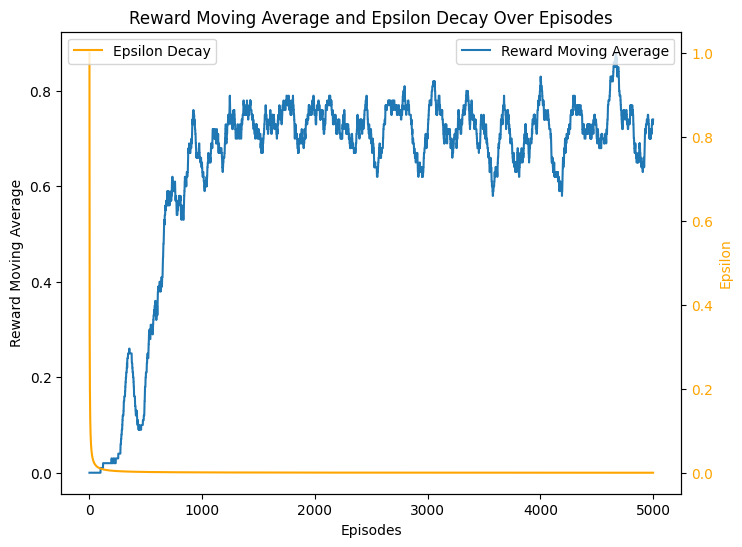

In [3]:
# 報酬の移動平均を計算する
episodes_x = np.arange(0,episodes,1)
data_series = pd.Series(reward_list)
moving_avg = data_series.rolling(window=100, min_periods=1).mean()
epsilon_decay = [1.0 / (i + 1) for i in range(episodes)]

# 移動平均のプロット
plt.figure(figsize=(8, 6))
ax1 = plt.gca()
ax1.plot(episodes_x, moving_avg, label='Reward Moving Average')  # 最初の数値を移動平均の分だけずらす
ax1.set_xlabel('Episodes')
ax1.set_ylabel('Reward Moving Average')
ax1.tick_params(axis='y')

# εの減少のプロット
ax2 = ax1.twinx()
ax2.plot(episodes_x, epsilon_decay, label='Epsilon Decay', color='orange')
ax2.set_ylabel('Epsilon', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Reward Moving Average and Epsilon Decay Over Episodes')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')

plt.show()
